## Getting Rid of Field Stars

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [1]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#read in phot file
photData = pd.read_csv('NGC6819.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
0,100300001,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-9.9000,-9.9000,0.020,0.018,0.021,0.0,0.0,1,0.013,1
1,108590002,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,0.0100,0.1720,0.023,0.017,0.018,0.0,0.0,1,0.014,1
2,109170003,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-9.9000,-9.9000,0.023,0.026,0.016,0.0,0.0,1,0.025,1
3,111330004,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-9.9000,-9.9000,0.023,0.031,0.018,0.0,0.0,1,0.033,1
4,100210005,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-9.9000,-9.9000,0.023,0.015,0.018,0.0,0.0,1,0.022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,122902575,20.8676,21.3298,20.2808,21.5337,20.9281,20.6569,20.4802,20.2391,99.900,...,0.0315,0.3061,-9.900,-9.900,-9.900,0.0,0.0,1,0.085,1
2575,115172576,20.8750,21.2513,20.5470,21.4135,20.8601,20.6260,20.5151,20.1972,99.900,...,0.2331,0.1430,-9.900,-9.900,-9.900,0.0,0.0,1,0.008,1
2576,116032577,20.8903,21.1500,20.2660,21.4914,20.6895,20.4278,20.3339,19.9900,99.900,...,0.0701,0.0737,-9.900,-9.900,-9.900,0.0,0.0,1,0.408,1
2577,113862578,20.8937,20.8228,19.8898,22.1363,20.9247,20.4499,20.0596,19.7728,99.900,...,0.0609,0.0583,-9.900,-9.900,-9.900,0.0,0.0,1,0.034,1


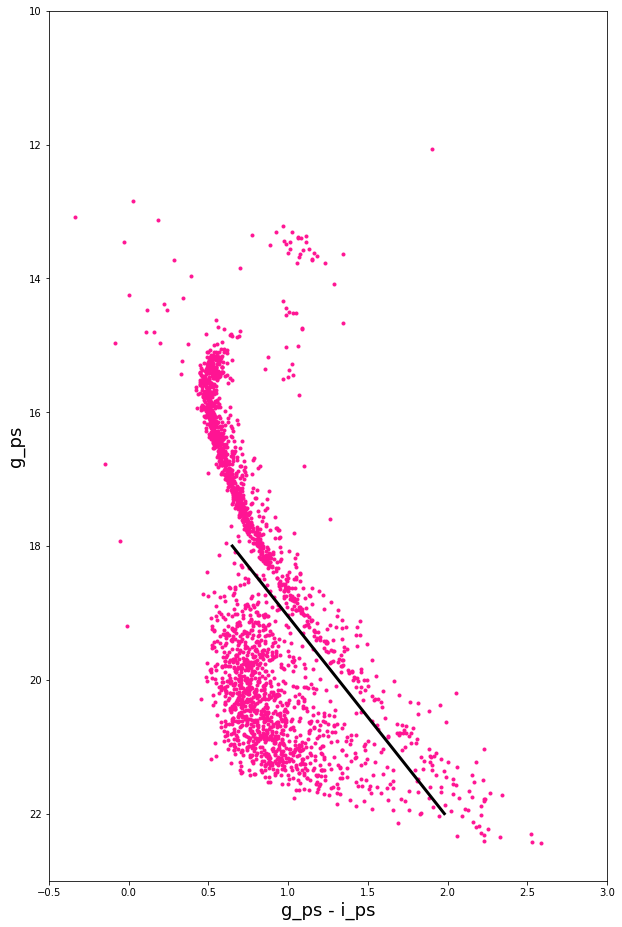

In [8]:
# plot CMD 
f, ax = plt.subplots(figsize=(10,16))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0.65
x2=1.98
y1=18
y2=22
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [4]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 3.007518796992481
The intercept for this line is 16.045112781954888


In [10]:
#copy this onto command line in gitbash with changed m and b values
#cat M35.phot | awk '{if (NR == 1 || $5 < m*($5 - $7) + b) print $0}' > M35.new.phot

#cat NGC6819.phot | awk '{if (NR == 1 || $5 < 3.0075*($5 - $7) + 16.045) print $0}' > NGC6819.new.phot

SyntaxError: invalid syntax (2999085755.py, line 4)

In [5]:
#read in new phot file
newPhotData = pd.read_csv('NGC6819.new.phot',delim_whitespace=True)
df2 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

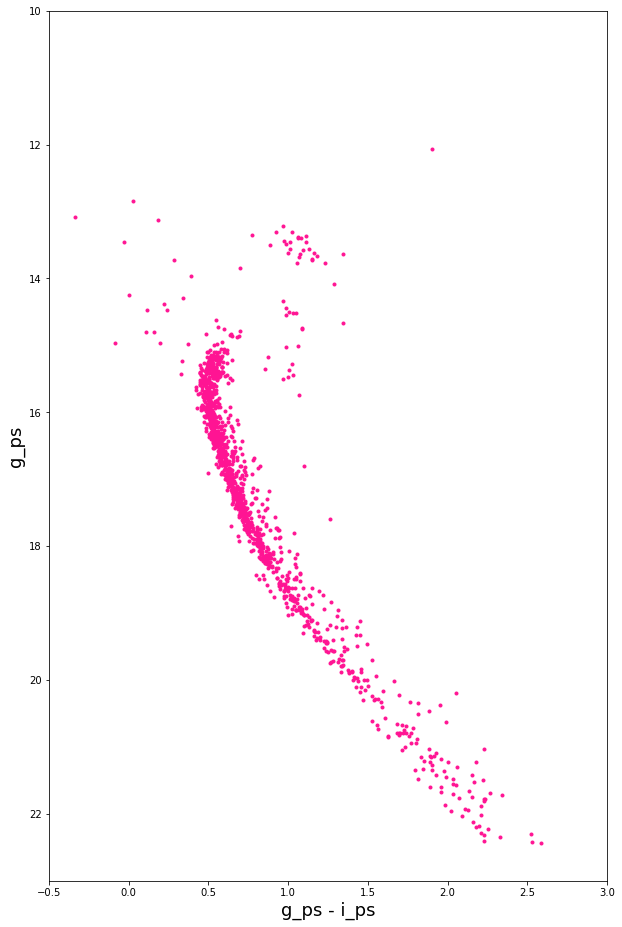

In [7]:
#plot new CMD
f, ax = plt.subplots(figsize=(10,16))
ax.plot(df2['g_ps']-df2['i_ps'],df2['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)